In [4]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np
from pandas.api.types import is_string_dtype, is_numeric_dtype

In [2]:
df = pd.read_excel(r'C:\Users\Administrateur\Documents\ranking.xlsx')

df.head()

,Rank,Restaurant,Sales,Average Check,City,State,Meals Served,Unnamed: 7,Unnamed: 8
0,1,Carmine's (Times Square),39080335,40,New York,N.Y.,469803.0,NaN,80.0
1,2,The Boathouse Orlando,35218364,43,Orlando,Fla.,820819.0,NaN,NaN
2,3,Old Ebbitt Grill,29104017,33,Washington,D.C.,892830.0,NaN,NaN
3,4,LAVO Italian Restaurant & Nightclub,26916180,90,New York,N.Y.,198500.0,NaN,NaN
4,5,Bryant Park Grill & Cafe,26900000,62,New York,N.Y.,403000.0,NaN,NaN


In [8]:
df = df.drop(['Unnamed: 7', 'Unnamed: 8'], axis=1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           100 non-null    int64  
 1   Restaurant     100 non-null    object 
 2   Sales          100 non-null    int64  
 3   Average Check  100 non-null    int64  
 4   City           100 non-null    object 
 5   State          100 non-null    object 
 6   Meals Served   100 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 4.4+ KB


In [10]:
df.describe()

,Rank,Sales,Average Check,Meals Served
count,100.000000,1.000000e+02,100.000000,100.000000
mean,50.500000,1.783343e+07,69.050000,317166.660000
std,29.011492,5.010408e+06,34.735181,192211.390011
min,1.000000,1.139168e+07,17.000000,87070.000000
25%,25.750000,1.409484e+07,39.000000,189492.500000
50%,50.500000,1.730078e+07,65.500000,257097.000000
75%,75.250000,1.990392e+07,95.000000,372079.000000
max,100.000000,3.908034e+07,194.000000,959026.000000


In [11]:
df.isnull().sum()

Rank             0
Restaurant       0
Sales            0
Average Check    0
City             0
State            0
Meals Served     0
dtype: int64

<AxesSubplot:>

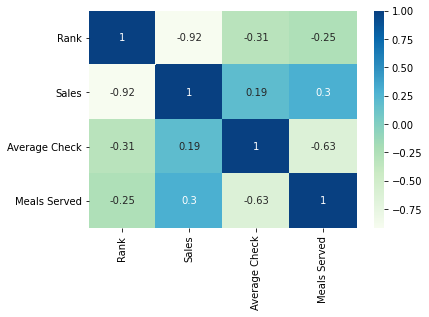

In [12]:
correlation = df.corr()
sns.heatmap(correlation, cmap = 'GnBu', annot=True)

<AxesSubplot:>

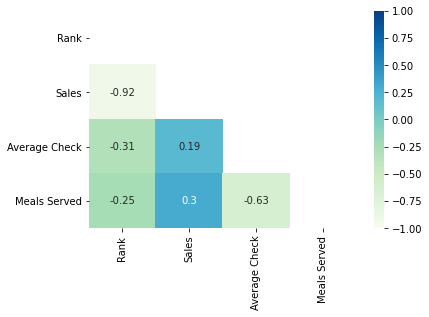

In [13]:
mask = np.zeros(correlation.shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True
sns.heatmap(correlation, vmin = -1, vmax = 1, center = 0, cmap = 'GnBu', annot = True, mask = mask)

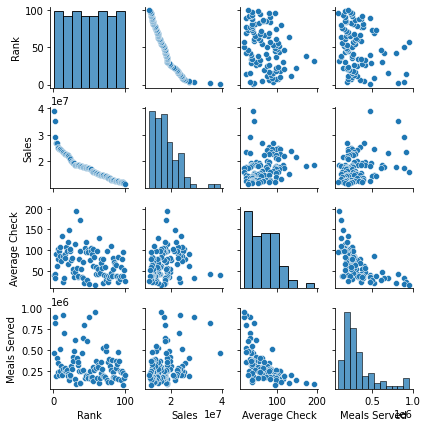

In [17]:
sns.pairplot(df, height=1.5)

In [21]:
df.dtypes

Rank               int64
Restaurant        object
Sales              int64
Average Check      int64
City              object
State             object
Meals Served     float64
dtype: object

In [2]:
! pip install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9680 sha256=75208540cfe1b8330032f53680663e5d66635f313ba26d23b2da48feeb65d9bc
  Stored in directory: c:\users\administrateur\appdata\local\pip\cache\wheels\bd\a8\c3\3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget


In [4]:
import pandas as pd
import zipfile
import wget
url = 'https://analyse.kmi.open.ac.uk/open_dataset/download'
filename = wget.download(url)
zpf = zipfile.ZipFile(filename)
student_vle = pd.read_csv(zpf.open('studentVle.csv'))
student_vle

100% [....................................................] 46750706 / 46750706

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1
...,...,...,...,...,...,...
10655275,GGG,2014J,675811,896943,269,3
10655276,GGG,2014J,675578,896943,269,1
10655277,GGG,2014J,654064,896943,269,3
10655278,GGG,2014J,654064,896939,269,1


In [5]:
student_groups = student_vle.groupby('id_student')
activity_counts = student_groups.count()
activity_counts.head()

,code_module,code_presentation,id_site,date,sum_click
id_student,,,,,
6516,662,662,662,662,662
8462,304,304,304,304,304
11391,196,196,196,196,196
23629,59,59,59,59,59
23698,305,305,305,305,305


In [6]:
average_clicks = student_groups.mean()
print('Mean of median clicks per activity is',    
       average_clicks['sum_click'].mean())
average_clicks.head()

Mean of median clicks per activity is 3.277612411690169


,id_site,date,sum_click
id_student,,,
6516,877282.676737,110.483384,4.216012
8462,675792.838816,37.128289,2.157895
11391,546697.668367,102.132653,4.765306
23629,542863.067797,43.033898,2.728814
23698,911160.937705,85.639344,2.983607


In [7]:
activities_and_clicks = pd.merge(left=activity_counts['id_site'], 
                                 right=average_clicks['sum_click'],
                                 how='inner',
                                 on='id_student')
cols = ['Total Activities Engaged', 'Average Clicks per Activity']
activities_and_clicks.columns = cols
activities_and_clicks.head()

,Total Activities Engaged,Average Clicks per Activity
id_student,,
6516,662,4.216012
8462,304,2.157895
11391,196,4.765306
23629,59,2.728814
23698,305,2.983607


In [8]:
module_group = student_vle.groupby('code_module')
module_averages = module_group.mean()
module_counts = module_group.count()
modules = pd.merge(module_counts['id_site'], 
                                module_averages['sum_click'],
                                how='inner',
                                on='code_module')
modules.columns = ['Total Activities Engaged','Average Clicks per Activity']
modules

MemoryError: Unable to allocate 325. MiB for an array with shape (4, 10655280) and data type int64

How to Boost Pandas Functions with Python Dictionaries

In [9]:
import numpy as np
import pandas as pd
cols =['Price','Landsize','Distance','Type','Regionname']
melb = pd.read_csv(
   "/content/melb_data.csv",
   usecols = cols,
   dtype = {'Price':'int'},
   na_values = {'Landsize':9999, 'Regionname':'?'}
)
melb.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/melb_data.csv'